# Final Linear Regression Assignment

### Bagirov Isa

## Quick description:

The data was taken from sklearn.datasets library, which is a collection of all types of datasets for practising your skils in data science and data analysis. The data is California housing data, which is a collection of houses in California state with their Median Value.

## I. Data Description

*Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score

## II. Data Exploration Plan

In this section I will show the attributes of data and their condition.

In [2]:
def load_california():
    cal = fetch_california_housing()
    data = cal.data
    target = cal.target
    cols = cal.feature_names
    target = target.reshape(target.shape[0], -1)
    data_all = np.concatenate([data, target], axis = 1)
    cols = np.concatenate([cols, np.array(['MedHouseVal'])])
    data_fin = pd.DataFrame(data = data_all, columns = cols)
    return data_fin

In [3]:
data = load_california()
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


As we see, the data have 20640 instances and all columns are float64 type, so we do not need any one-hot encoding for categorical columns and there is not any missing values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Dropping columns for latitude and longitude will be a good practise in our case. It can be useful only when you try to find some clusters in dataset(premium neigbourhood, ghetto etc.) 

Let's demonstrate the Median Income(feature) from dataset. As we see the distribution of feature are higly skewed to the right and I checked the distribution after log transformation. There is clearly seen that distribution become normal.

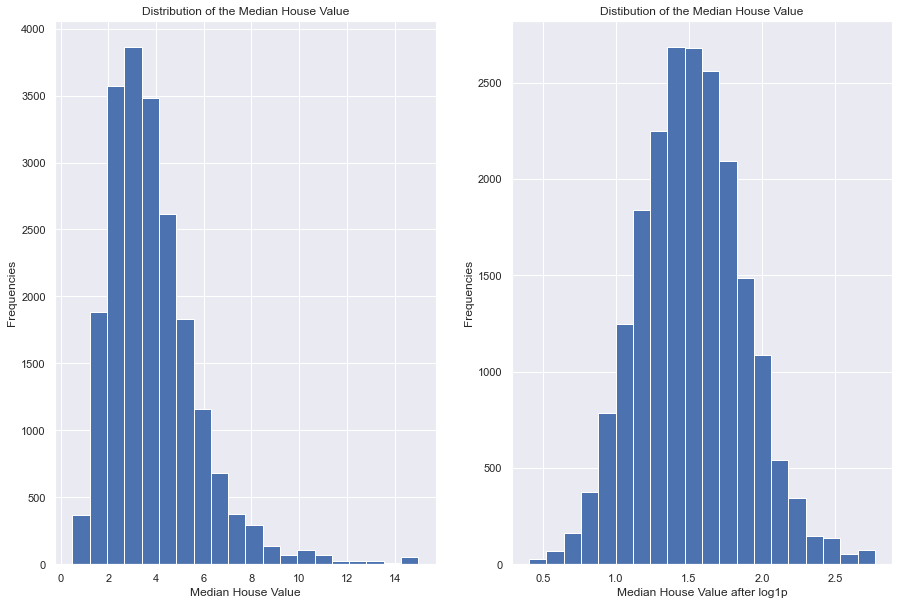

In [5]:
sns.set()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))

ax1.hist(data.MedInc, bins = 20)
ax1.set(xlabel = "Median House Value",
       ylabel = "Frequencies",
       title = "Distribution of the Median House Value")

ax2.hist(data['MedInc'].apply(np.log1p), bins = 20)
ax2.set(xlabel = "Median House Value after log1p",
        ylabel = "Frequencies",
        title = "Distibution of the Median House Value")
plt.show()

I plotted other histograms for checking skewness

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

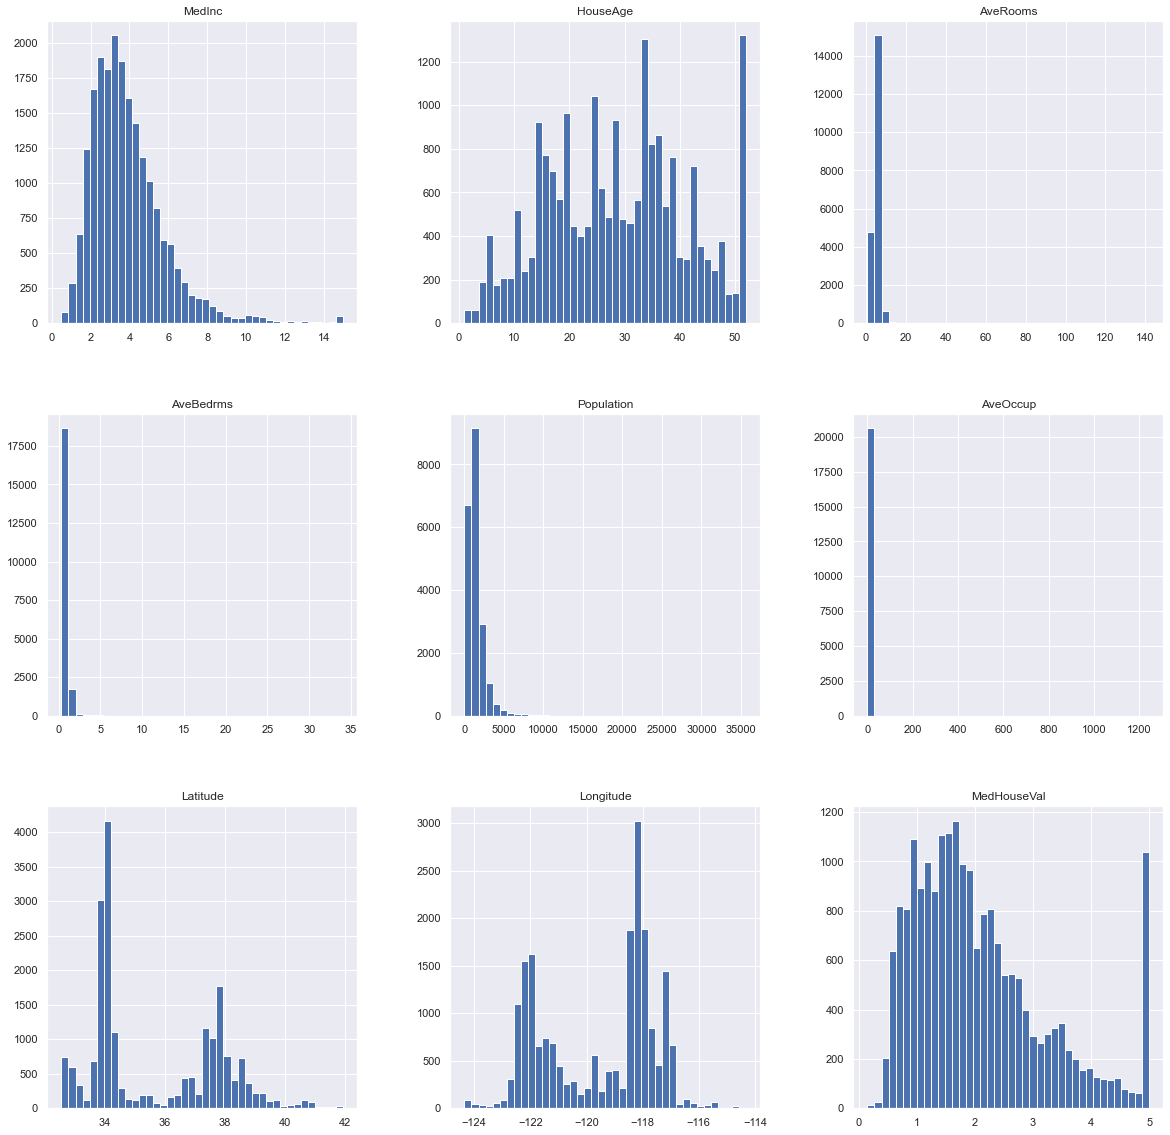

In [6]:
data.hist(figsize = (20, 20), bins = 40)

## III) Transformation of Variables

In this section I choosed columns with high skewness coefficent and made log1p transformation

In [7]:
skew_limit = 0.75
skew_vals = data.skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
AveOccup,97.639561
AveBedrms,31.316956
AveRooms,20.697869
Population,4.935858
MedInc,1.646657
MedHouseVal,0.977763


In [8]:
for col in skew_cols.index:
    if col == 'MedHouseVal':
        continue
    data[col] = data[col].apply(np.log1p)

The data are more normally distributed after transformation.

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

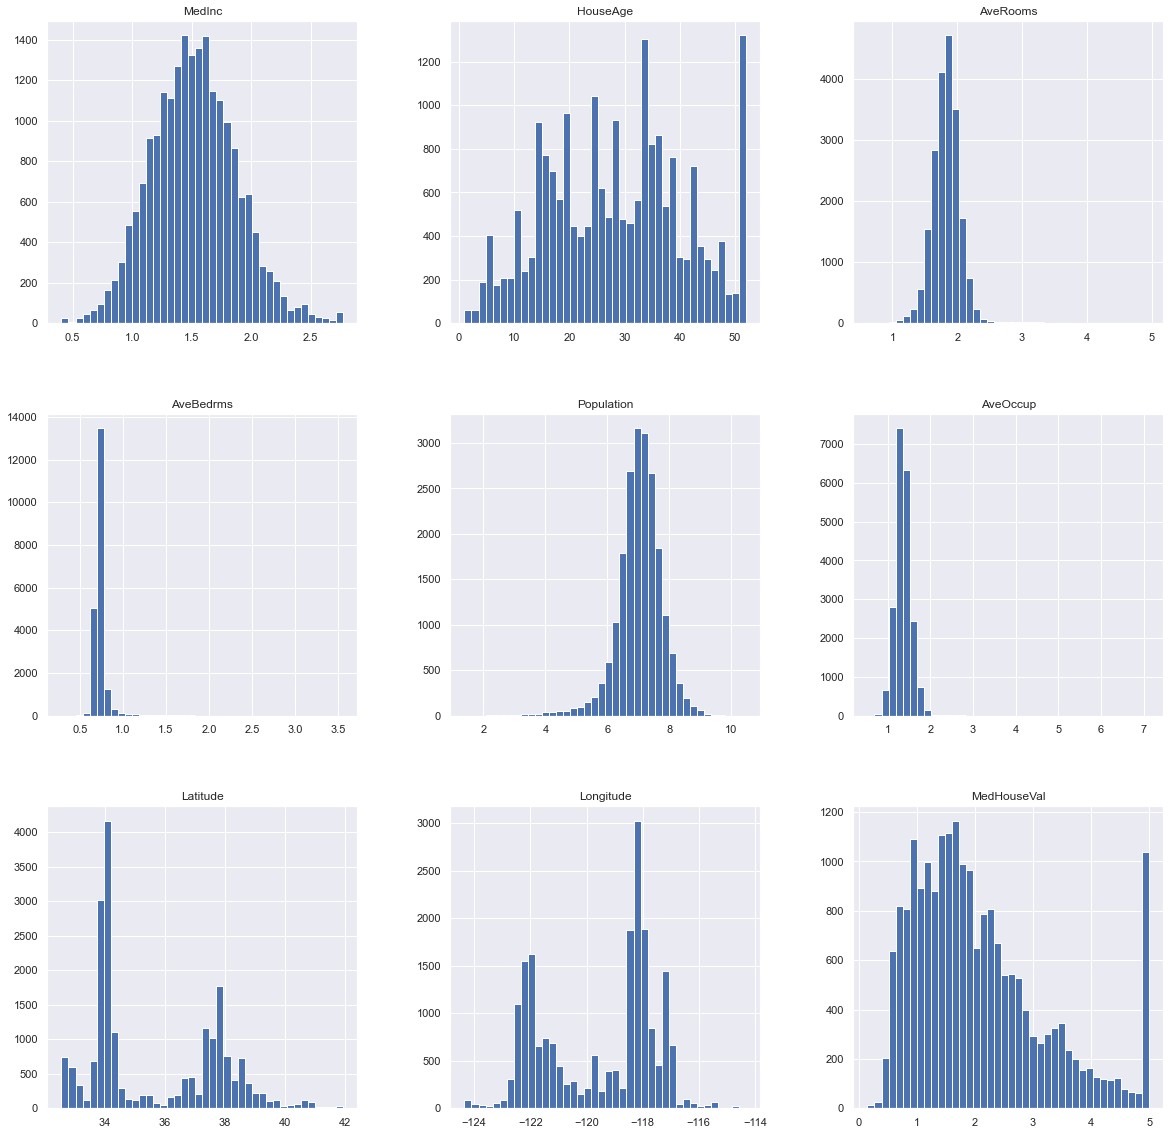

In [9]:
data.hist(figsize = (20, 20), bins = 40)

## IV) Splitting the data and applying 3 regressions to them

Here I made train/test splitting for our data

In [29]:
y_col = 'MedHouseVal'
X = data.drop(y_col, axis = 1)
Y = data[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print(X_test.shape, y_test.shape)

(6192, 8) (6192,)


Main metrics for analyzing regression power will be Root Mean Squared Error

In [30]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))



### Simple Linear Regression:

In [31]:
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

0.7024101089179978


### Lasso Regression:

In [32]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

1e-05 0.7023993790430955


### Ridge Regression:

In [33]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

0.005 0.702409453412405


### Elastic Net Regularization:

In [34]:
from sklearn.linear_model import ElasticNetCV
l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

1e-05 0.9 0.702398569333669


In [35]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,0.702410
Ridge,0.702409
Lasso,0.702399
ElasticNet,0.702399


In [36]:
from sklearn.linear_model import SGDRegressor


model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,0.702410,1.142227
Ridge,0.702409,1.142437
Lasso,0.702399,1.142229
ElasticNet,0.702399,1.142225


## V)Summary

The best model for California dataset will be Lasso regression in terms of accuracy and interpretability. 

## VI) Further steps

As a further steps it will be very good to add some polynomial features to see the interactions between features